In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

X_train.shape

(40000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(40000, 1)

In [6]:
y_train = y_train.reshape(-1, )
y_train

array([4, 8, 1, ..., 5, 7, 8], dtype=uint8)

In [7]:
y_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
len(y_classes)

10

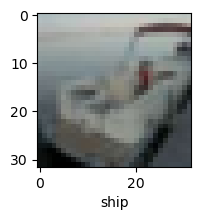

In [8]:
def DisplayImage(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])
    
DisplayImage(X_train, y_train, 1)

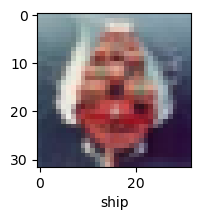

In [9]:
DisplayImage(X_train, y_train, 3)

In [10]:
X_train[0]

array([[[237, 239, 108],
        [204, 207,  99],
        [203, 204, 101],
        ...,
        [203, 202, 104],
        [201, 203, 104],
        [224, 224, 113]],

       [[163, 168,  86],
        [ 86,  97,  64],
        [ 96, 109,  71],
        ...,
        [ 80,  91,  64],
        [ 78,  88,  64],
        [121, 125,  71]],

       [[109, 118,  65],
        [ 62,  82,  85],
        [ 68,  94,  86],
        ...,
        [ 72,  96,  86],
        [ 67,  90,  90],
        [ 70,  79,  64]],

       ...,

       [[127, 131,  58],
        [108, 118,  61],
        [121, 125,  65],
        ...,
        [154, 150,  78],
        [133, 135,  71],
        [116, 116,  65]],

       [[126, 130,  55],
        [ 75,  83,  44],
        [101, 103,  60],
        ...,
        [109, 114,  53],
        [102, 103,  59],
        [100,  99,  47]],

       [[190, 194,  87],
        [129, 138,  66],
        [141, 145,  73],
        ...,
        [140, 148,  64],
        [140, 143,  70],
        [164, 164,  75]]

In [11]:
X_train = X_train/255
X_test = X_test/255
X_validation = X_validation/255

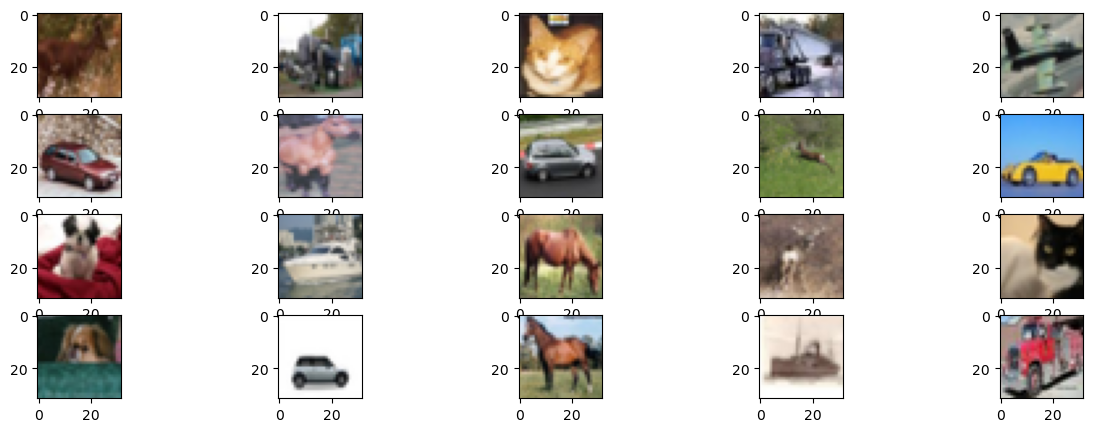

In [14]:
f, axarr = plt.subplots(4,5,figsize=(15,5))

a = 0

for i in range(4) :
    for j in range(5) :
        
        a +=1 
        axarr[i,j].imshow(X_train[4*a+i+j])   

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
epochs = 150
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [20]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test, y_test))

Epoch 1/150
1250/1250 [==============================] - 165s 131ms/step - loss: 2.0982 - accuracy: 0.2008 - val_loss: 1.7741 - val_accuracy: 0.3572
Epoch 2/150
1250/1250 [==============================] - 164s 131ms/step - loss: 1.8009 - accuracy: 0.3237 - val_loss: 1.6377 - val_accuracy: 0.4097
Epoch 3/150
1250/1250 [==============================] - 163s 130ms/step - loss: 1.6499 - accuracy: 0.3893 - val_loss: 1.4854 - val_accuracy: 0.4643
Epoch 4/150
1250/1250 [==============================] - 164s 131ms/step - loss: 1.5509 - accuracy: 0.4294 - val_loss: 1.3807 - val_accuracy: 0.5091
Epoch 5/150
1250/1250 [==============================] - 161s 129ms/step - loss: 1.4736 - accuracy: 0.4615 - val_loss: 1.3554 - val_accuracy: 0.5018
Epoch 6/150
1250/1250 [==============================] - 165s 132ms/step - loss: 1.4094 - accuracy: 0.4865 - val_loss: 1.2384 - val_accuracy: 0.5594
Epoch 7/150
1250/1250 [==============================] - 161s 128ms/step - loss: 1.3514 - accuracy: 0.5116

Epoch 56/150
1250/1250 [==============================] - 110s 88ms/step - loss: 0.5571 - accuracy: 0.8069 - val_loss: 0.5805 - val_accuracy: 0.8078
Epoch 57/150
1250/1250 [==============================] - 108s 86ms/step - loss: 0.5439 - accuracy: 0.8094 - val_loss: 0.5700 - val_accuracy: 0.8104
Epoch 58/150
1250/1250 [==============================] - 109s 87ms/step - loss: 0.5355 - accuracy: 0.8125 - val_loss: 0.5642 - val_accuracy: 0.8137
Epoch 59/150
1250/1250 [==============================] - 104s 83ms/step - loss: 0.5403 - accuracy: 0.8101 - val_loss: 0.5511 - val_accuracy: 0.8185
Epoch 60/150
1250/1250 [==============================] - 107s 86ms/step - loss: 0.5334 - accuracy: 0.8125 - val_loss: 0.5488 - val_accuracy: 0.8191
Epoch 61/150
1250/1250 [==============================] - 107s 86ms/step - loss: 0.5289 - accuracy: 0.8162 - val_loss: 0.5614 - val_accuracy: 0.8154
Epoch 62/150
1250/1250 [==============================] - 109s 87ms/step - loss: 0.5222 - accuracy: 0.8183

Epoch 111/150
1250/1250 [==============================] - 103s 82ms/step - loss: 0.3568 - accuracy: 0.8741 - val_loss: 0.5051 - val_accuracy: 0.8417
Epoch 112/150
1250/1250 [==============================] - 102s 82ms/step - loss: 0.3552 - accuracy: 0.8748 - val_loss: 0.5054 - val_accuracy: 0.8377
Epoch 113/150
1250/1250 [==============================] - 102s 82ms/step - loss: 0.3521 - accuracy: 0.8758 - val_loss: 0.5226 - val_accuracy: 0.8398
Epoch 114/150
1250/1250 [==============================] - 103s 82ms/step - loss: 0.3537 - accuracy: 0.8760 - val_loss: 0.5153 - val_accuracy: 0.8374
Epoch 115/150
1250/1250 [==============================] - 102s 81ms/step - loss: 0.3429 - accuracy: 0.8794 - val_loss: 0.5096 - val_accuracy: 0.8414
Epoch 116/150
1250/1250 [==============================] - 103s 82ms/step - loss: 0.3420 - accuracy: 0.8797 - val_loss: 0.5073 - val_accuracy: 0.8412
Epoch 117/150
1250/1250 [==============================] - 103s 82ms/step - loss: 0.3455 - accuracy:

In [22]:
y_prediction = model.predict(X_validation)
y_prediction_classes = [np.argmax(element) for element in y_prediction]

313/313 [==============================] - 5s 16ms/step


In [23]:
print("Classification report: \n", classification_report(y_validation, y_prediction_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       982
           1       0.92      0.94      0.93       980
           2       0.76      0.79      0.78       980
           3       0.74      0.71      0.72      1036
           4       0.82      0.85      0.83      1054
           5       0.74      0.76      0.75       926
           6       0.88      0.89      0.88      1001
           7       0.89      0.84      0.86      1025
           8       0.94      0.92      0.93       967
           9       0.92      0.90      0.91      1049

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



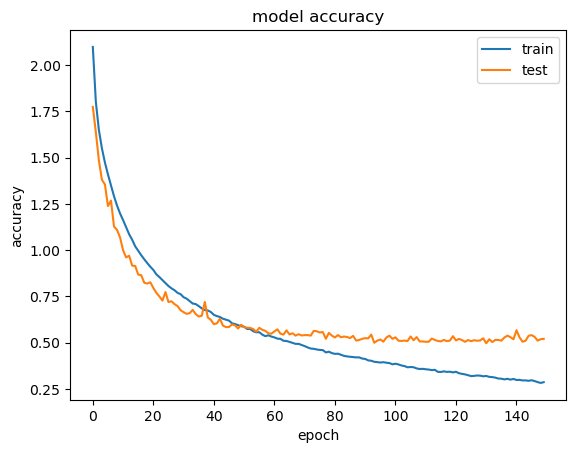

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

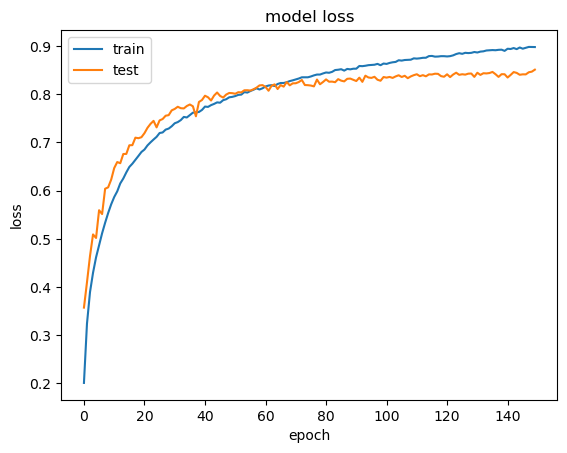

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [29]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
epochs = 50

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test, y_test))     

Epoch 1/50
1250/1250 [==============================] - 136s 108ms/step - loss: 1.9505 - accuracy: 0.3406 - val_loss: 1.4859 - val_accuracy: 0.4637
Epoch 2/50
1250/1250 [==============================] - 134s 107ms/step - loss: 1.4742 - accuracy: 0.4628 - val_loss: 1.3917 - val_accuracy: 0.5108
Epoch 3/50
1250/1250 [==============================] - 135s 108ms/step - loss: 1.3341 - accuracy: 0.5155 - val_loss: 1.4458 - val_accuracy: 0.4696
Epoch 4/50
1250/1250 [==============================] - 139s 111ms/step - loss: 1.2352 - accuracy: 0.5559 - val_loss: 1.1291 - val_accuracy: 0.5927
Epoch 5/50
1250/1250 [==============================] - 139s 111ms/step - loss: 1.1603 - accuracy: 0.5849 - val_loss: 1.1899 - val_accuracy: 0.5698
Epoch 6/50
1250/1250 [==============================] - 134s 107ms/step - loss: 1.0991 - accuracy: 0.6104 - val_loss: 1.0416 - val_accuracy: 0.6240
Epoch 7/50
1250/1250 [==============================] - 137s 109ms/step - loss: 1.0518 - accuracy: 0.6231 - val_

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

y_prediction = model.predict(X_validation)
y_prediction_classes = [np.argmax(element) for element in y_prediction]

print("Classification Report: \n", classification_report(y_validation, y_prediction_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       982
           1       0.96      0.89      0.92       980
           2       0.82      0.70      0.76       980
           3       0.75      0.60      0.67      1036
           4       0.70      0.88      0.78      1054
           5       0.72      0.74      0.73       926
           6       0.78      0.91      0.84      1001
           7       0.86      0.81      0.83      1025
           8       0.89      0.93      0.91       967
           9       0.90      0.92      0.91      1049

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



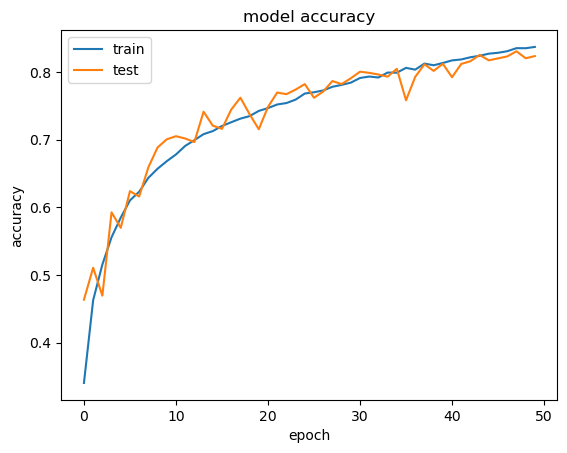

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

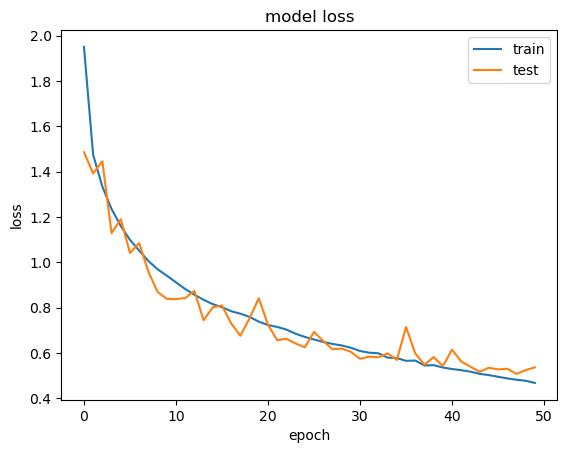

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 30ms/step - loss: 0.5365 - accuracy: 0.8236


[0.5364573001861572, 0.8235999941825867]